#### Algorithm 4: Modification of a hypergraph to reach a target fibre partition of the nodes.

In this notebook we will start from a small known hypergraph to visualize it and we will apply Algorithm 4 to obtain a new hypergraph compatible with the partition of nodes in fibres corresponding to the one expected. 
To optimize the number of added hyperedges we will then apply Algorithm 3 passing as parameter the original list of hyperedges in a way to avoid cancelling them.

We will test the partition in fibres of the new hypergraph to test if it is reached.

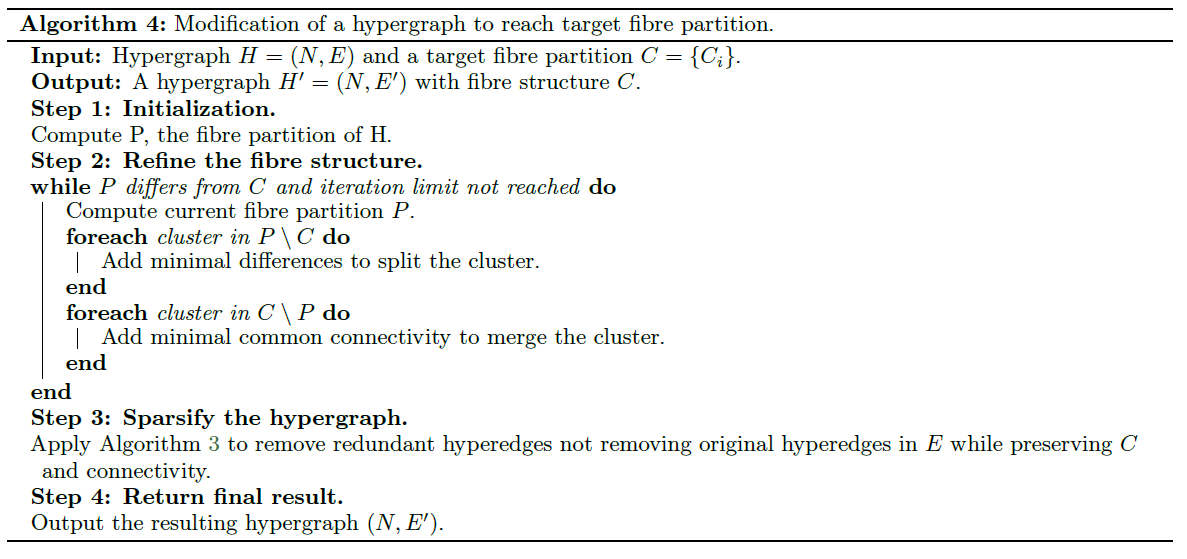

In [1]:
# Libraries
import sys
sys.path.insert(0, '../Utilities')

import networkx as nx

import hypergraphx as hx
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.generation.random import random_hypergraph
from hypergraphx.viz import draw_hypergraph

from utilities_fibration import *
from draw_hypergraph_col import *
from hypg_modifications_utilities import *

In [2]:
# Small hypergraph with known structure
edge_list_sc = [[0,1],[1,2],[2,3],[0,2],[0,1,2],[3,4,5],[6,7,8],[1,6]] 

# Random hypergraph
## N = 200 
## hpg = random_hypergraph(N, {2: 120, 3: 80})
## sub_hpg = hpg.subhypergraph_largest_component()
## edge_list_sc_filtered_holes = [list(x) for x in sub_hpg.get_edges()]
## edge_list_sc = normalize_sequence(edge_list_sc_filtered_holes)[0]


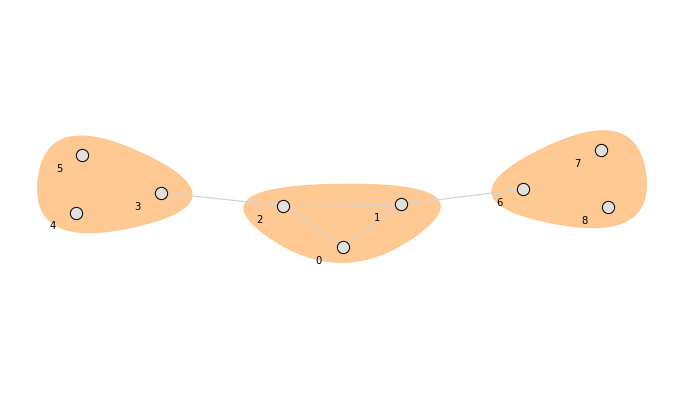

In [3]:
# Create and visualize hypergraph

H =  edge_list_sc

hg = Hypergraph(H)

draw_hypergraph(hg, with_node_labels=True)


In [4]:
# Find coloring
result_hg_tot = hypergraph_coloring_list([H])

In [5]:
# Write the fibres as list of lists

edge_name_dict = result_hg_tot[0][2]
edge_col_dict = result_hg_tot[0][1]

node_cluster_hg = {k: v for k, v in result_hg_tot[0][1].items() if k.startswith('N')}
cl_hg = []
# Consider the node partition for the hypergraph
for val in set(node_cluster_hg.values()):
    cl_hg.append([k for k, v in node_cluster_hg.items() if v == val])

dic = {v: edge_col_dict[k] for k, v in edge_name_dict.items()}

list_c = cl_hg

# Transform the list of the node cluster substituting with the original names
clusters = [[edge_name_dict[item] for item in sublist] for sublist in list_c]    
clusters   

[[3, 6], [4, 5, 7, 8], [0], [1, 2]]

In [6]:
# Target clusters to force
C = [[2], [4, 5], [3], [0], [1], [7, 8], [6]]

In [7]:
# Apply the algorithm to force the fiber partition
forced_hyperedges = refine_hypergraph(H, C, 20, False)

Starting hypergraph refinement...
Initial hypergraph: [[0, 1], [1, 2], [2, 3], [0, 2], [0, 1, 2], [3, 4, 5], [6, 7, 8], [1, 6]]
Target clusters: [[0], [1], [2], [3], [4, 5], [6], [7, 8]]
Allow multiplicity: False

=== Step 1 ===
Current partition: [[0], [1, 2], [3, 6], [4, 5, 7, 8]]
Current hyperedges: [[0, 1], [1, 2], [2, 3], [0, 2], [0, 1, 2], [3, 4, 5], [6, 7, 8], [1, 6]]
frozenset({4, 5})
2
Skipping split for cluster [4, 5, 7, 8] - nodes belong to larger target cluster
Need to split: [[3, 6], [1, 2]]
Need to merge: [[4, 5], [7, 8]]
  Merging cluster: [4, 5]
    External patterns to match: [(3, 4), (3, 5)]
    Skipped duplicate hyperedge: [4, 3, 4]
    Skipped duplicate hyperedge: [5, 3, 5]
  Merging cluster: [7, 8]
    External patterns to match: [(6, 7), (6, 8)]
    Skipped duplicate hyperedge: [8, 6, 8]
    Skipped duplicate hyperedge: [7, 6, 7]
Total edges added this step: 2

=== Step 2 ===
Current partition: [[0, 1], [2], [3, 4], [5], [6], [7, 8]]
Current hyperedges: [[0, 1], [

In [8]:
print(f'New length: {len(forced_hyperedges)}')
print(f'Original length: {len(H)}')

New length: 15
Original length: 8


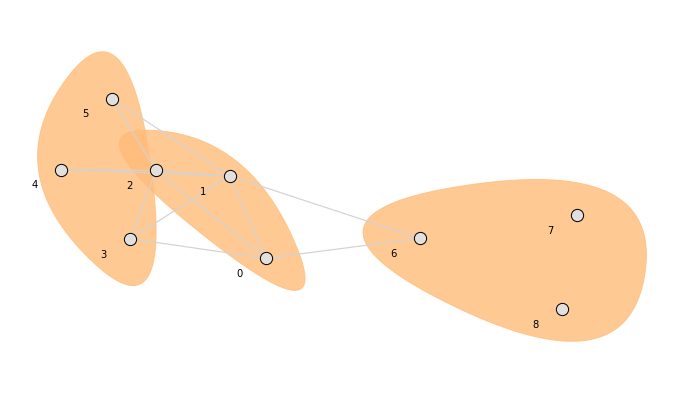

In [9]:
# Visualize the new hypergraph
hg = Hypergraph(forced_hyperedges)

draw_hypergraph(hg, with_node_labels=True)

To reduce the number of hyperedges, apply the Algorithm 3 for removing redundant edges but fixing the initial set of hyperedges untouched

In [10]:
result_hg_tot_f = hypergraph_coloring_list([forced_hyperedges])

forced_hyperedges, forced_color_dict, forced_node_map = result_hg_tot_f[0]

# Initial hyperedges to not remove
set_hyperedges = set(frozenset(sublist) for sublist in H)

pruned_hyperedges, pruned_color_dict, pruned_node_map, pruned_clusters = optimize_color_removal(
    forced_hyperedges, forced_color_dict, forced_node_map, C, 5, True, set_hyperedges)


Removed hyperedges of original color 0. Hypergraph is still connected.
Clusters are consistent after removing color 0.
Removed hyperedges of original color 4. Hypergraph is still connected.
Clusters are consistent after removing color 4.
Removed hyperedges of original color 9. Hypergraph is still connected.
Clusters are consistent after removing color 9.
Removed hyperedges of original color 5. Hypergraph is still connected.
Clusters are consistent after removing color 5.
Removed hyperedges of original color 8. Hypergraph is still connected.
Cluster check failed after removing color 8. Rolling back.
len: 10
Tried 1 permutations.

*************************
Removed hyperedges of original color 0. Hypergraph is still connected.
Clusters are consistent after removing color 0.
Removed hyperedges of original color 5. Hypergraph is still connected.
Clusters are consistent after removing color 5.
Removed hyperedges of original color 9. Hypergraph is still connected.
Cluster check failed after r

In [11]:
print(f'Original length: {len(H)}')
print(f'New length: {len(forced_hyperedges)}')
print(f'Pruned length: {len(pruned_hyperedges)}')

Original length: 8
New length: 15
Pruned length: 10


In [12]:
# Compute coloring of the pruned hypergraph to compare with the original clusters

result_hg_tot_p = hypergraph_coloring_list([pruned_hyperedges])

edge_name_dict_p = result_hg_tot_p[0][2]
edge_col_dict_p = result_hg_tot_p[0][1]

node_cluster_hg_p = {k: v for k, v in result_hg_tot_p[0][1].items() if k.startswith('N')}
cl_hg_p = []
for val in set(node_cluster_hg_p.values()):
    cl_hg_p.append([k for k, v in node_cluster_hg_p.items() if v == val])

dic_p = {v: edge_col_dict_p[k] for k, v in edge_name_dict_p.items()}
list_c_p = cl_hg_p
clusters_pruned = [[edge_name_dict_p[item] for item in sublist] for sublist in list_c_p]

set_pruned = set(frozenset(inner) for inner in clusters_pruned)
set_original = set(frozenset(inner) for inner in C)

print(clusters_pruned)
print(C)

set_pruned == set_original
#pruned_clusters == clusters_pruned

[[3], [4, 5], [0], [6], [2], [1], [7, 8]]
[[2], [4, 5], [3], [0], [1], [7, 8], [6]]


True

In [13]:
# Compare forced clusters with the target clusters

set_forced = set(frozenset(inner) for inner in forced_hyperedges)
set_original = set(frozenset(inner) for inner in H)

print(forced_hyperedges)
print(H)

print(len(set_original.symmetric_difference(set_forced)))
print(set_original.symmetric_difference(set_forced))

[[0, 1], [1, 2], [2, 3], [0, 2], [0, 1, 2], [3, 4, 5], [6, 7, 8], [1, 6], [6, 0], [2, 4], [5, 2], [0, 3], [1, 3], [1, 4], [5, 1]]
[[0, 1], [1, 2], [2, 3], [0, 2], [0, 1, 2], [3, 4, 5], [6, 7, 8], [1, 6]]
7
{frozenset({1, 4}), frozenset({0, 6}), frozenset({0, 3}), frozenset({2, 5}), frozenset({2, 4}), frozenset({1, 5}), frozenset({1, 3})}


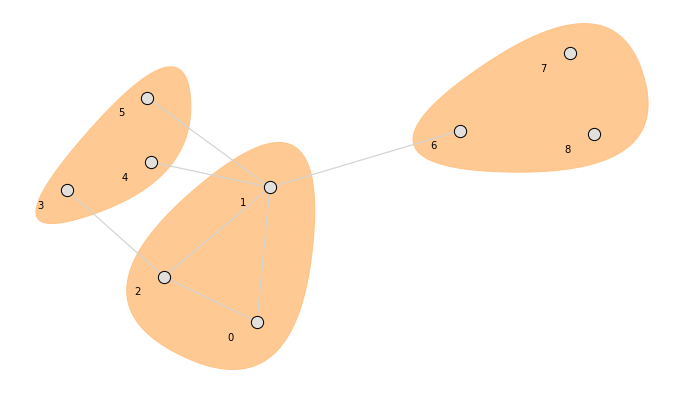

In [14]:
# Visualize the pruned hypergraph

H =  pruned_hyperedges

hg = Hypergraph(H)

draw_hypergraph(hg, with_node_labels=True)